In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pedro2/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
torch.cuda.set_device(1)

In [5]:
PATH = 'words/'
csv_path = PATH + 'csv_files/all.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

15993

In [6]:

arch = resnet50
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [7]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 131.5, 95.5, -0.5)

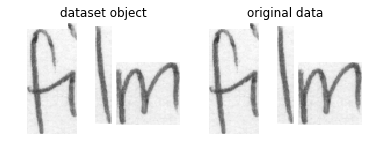

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [9]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/c03-000a-00-01.png']

In [10]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [11]:
learn = ConvLearner.pretrained(arch, data)

 90%|████████▉ | 179/200 [01:13<00:08,  2.42it/s, loss=10.8]

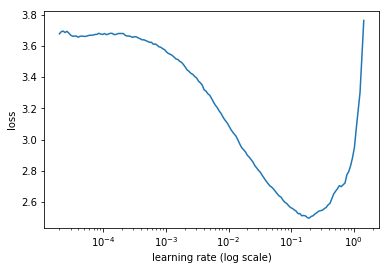

In [12]:
lrf=learn.lr_find()
learn.sched.plot()

In [13]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.606816   1.273642   0.612258  
    1      1.341066   1.028055   0.680425                   
    2      1.127318   0.946005   0.702627                   
    3      1.211631   0.957694   0.69137                    
    4      1.085203   0.863698   0.724515                   
    5      0.992906   0.793184   0.750156                    
    6      0.944007   0.786726   0.753596                    


[array([0.78673]), 0.7535959979084748]

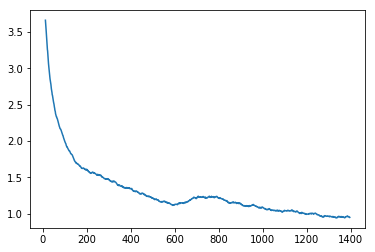

In [14]:
learn.sched.plot_loss()

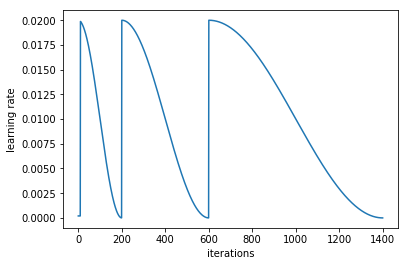

In [15]:
learn.sched.plot_lr()

In [16]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.729308   0.49114    0.837398  
    1      0.561866   0.383158   0.874922                    
    2      0.373188   0.304775   0.897436                    
    3      0.448267   0.479544   0.840213                    
    4      0.335014   0.273072   0.904628                    
    5      0.248673   0.224994   0.922764                    
    6      0.228105   0.204877   0.925891                    


[array([0.20488]), 0.9258911814668761]

In [17]:
learn.save(f'{sz}')

In [18]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [19]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [20]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 89%|████████▉ | 178/200 [01:09<00:08,  2.55it/s, loss=10.5]

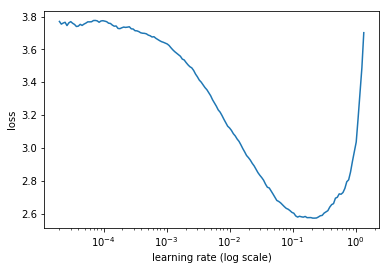

In [21]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [22]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.585507   1.277638   0.605066  
    1      1.328467   1.03846    0.6798                     
    2      1.145733   0.950563   0.70763                    
    3      1.177085   0.935213   0.702939                   
    4      1.095506   0.847214   0.737023                   
    5      0.981214   0.797309   0.751407                    
    6      0.980644   0.78282    0.754534                    


[array([0.78282]), 0.7545340836159955]

In [23]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.735541   0.477775   0.842402  
    1      0.533931   0.360355   0.881801                    
    2      0.375441   0.28426    0.910569                    
    3      0.422003   0.357261   0.881488                    
    4      0.327579   0.276499   0.908693                    
    5      0.231332   0.211778   0.93277                     
    6      0.222425   0.205262   0.934021                    


[array([0.20526]), 0.9340212630286225]

In [24]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [25]:
accuracy_np(preds, y)

0.9434021263289556

In [26]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [27]:
accuracy_np(preds,y)

0.9449656035021888